In [5]:
%load_ext autoreload
%matplotlib inline

In [26]:
%autoreload 2

import sys,os,glob
import matplotlib
import matplotlib.pyplot as plt

## Add own library to path
workdir = os.getcwd()
thismodule = sys.modules[__name__]
moduledir = os.path.join(os.path.dirname(workdir),'src')
functionsdir = os.path.join(os.path.dirname(workdir),'plotting/src')
sys.path.insert(0,moduledir)
sys.path.insert(0,functionsdir)
for includedir in [moduledir,functionsdir]:
    print("Own modules available:", [os.path.splitext(os.path.basename(x))[0]
                                     for x in glob.glob(os.path.join(includedir,'*.py'))])

from conditionalstats import *
from plot1DInvLog import *
from plot1D import *

## Graphical parameters
#plt.style.use(os.path.join(matplotlib.get_configdir(),'stylelib/presentation.mplstyle'))

Own modules available: ['conditionalstats']
Own modules available: ['plot1DInvLog', 'plotCondPDFs', 'plot1D', 'plot2D']


# Example distributions on linear bins

In [27]:
x_norm = np.random.normal(size=int(1e7)) # Sampling a standard normal distribution
xmax = 4
xmin = -xmax

In [28]:
y_lognorm = np.exp(x_norm) # lognormal distribution from x
ymin,ymax = np.exp(xmin),np.exp(xmax)

In [29]:
dist_x_linear = Distribution(name='x',nbins=40)
dist_x_linear.computeDistribution(sample=x_norm,vmin=xmin,vmax=xmax)

In [30]:
dist_y_linear = Distribution(name='y',nbins=40)
dist_y_linear.computeDistribution(sample=y_lognorm,vmin=ymin,vmax=ymax)

In [31]:
print(dist_x_linear)

bin_locations_stored : False
bins : [-4.  -3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4 -2.2 -2.  -1.8 -1.6 -1.4
 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4
  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  4. ]
bintype : linear
density : [2.13013377e-04 4.36027383e-04 8.81555362e-04 1.73460893e-03
 3.29970722e-03 5.96987491e-03 1.05036596e-02 1.76896109e-02
 2.86557996e-02 4.42147767e-02 6.60186460e-02 9.44194295e-02
 1.29841154e-01 1.71582775e-01 2.18050694e-01 2.66581241e-01
 3.11443059e-01 3.51243058e-01 3.80715909e-01 3.95586843e-01
 3.97021933e-01 3.81458956e-01 3.52064610e-01 3.11576067e-01
 2.66162215e-01 2.17374151e-01 1.72030304e-01 1.29811152e-01
 9.42814209e-02 6.58231337e-02 4.41822746e-02 2.85022899e-02
 1.74865982e-02 1.04196544e-02 6.10638348e-03 3.30120732e-03
 1.74160937e-03 8.88555801e-04 4.67029329e-04 2.19013754e-04]
fill_last_decade : None
frac_above_vmax : 3.24e-05
frac_below_vmin : 3.04e-05
name : x
nbins : 40
nbpd : None
nd : No

Text(0, 0.5, 'Cumulative density (CDF)')

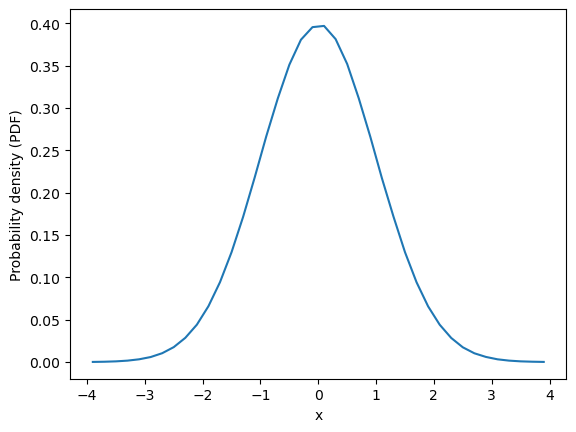

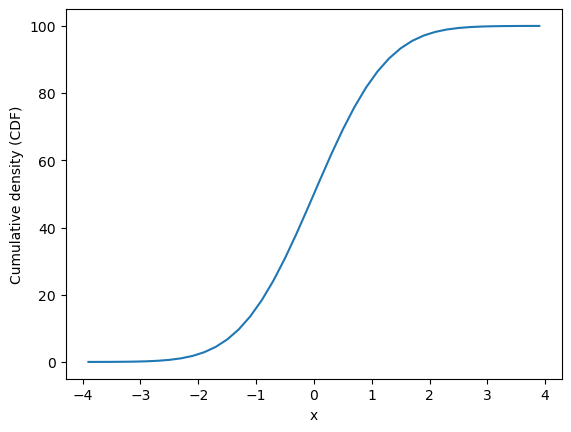

In [32]:
d = dist_x_linear
plt.plot(d.percentiles,d.density)
plt.xlabel('x')
plt.ylabel('Probability density (PDF)')

plt.figure()
plt.plot(d.percentiles,d.ranks)
plt.xlabel('x')
plt.ylabel('Cumulative density (CDF)')

# Example distributions on logarithmic bins

In [33]:
dist_y_log = Distribution(name='y',bintype='log',nbpd=50)
dist_y_log.computeDistribution(sample=y_lognorm,vmin=ymin,vmax=ymax)

In [34]:
# print(dist_y_log)

Text(0, 0.5, 'Probability density (PDF)')

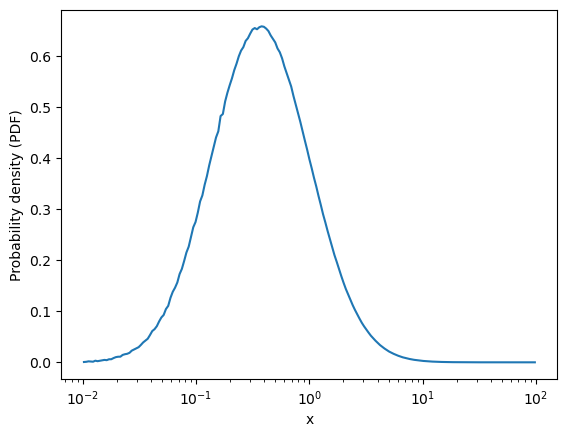

In [35]:
d = dist_y_log
plt.plot(d.percentiles,d.density)
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Probability density (PDF)')

The lognormal distribution, initially generated on regularly-spaced bins in x, appears noisier in bins containing few points after the logarithmic transformation. A lognormal process should appear smoother.

Text(0.5, 0, 'x')

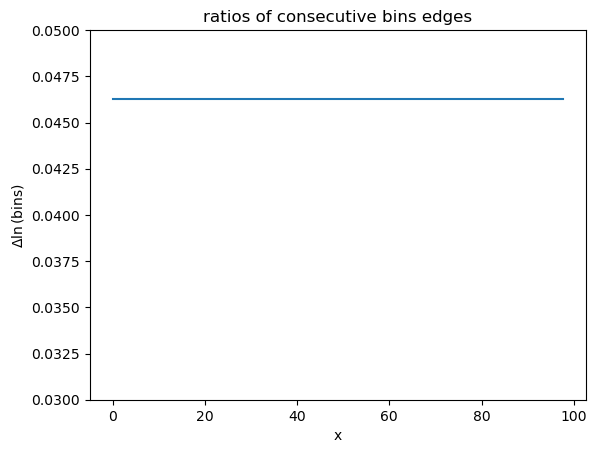

In [36]:
bin_ratios = np.log(dist_y_log.bins[1:]/dist_y_log.bins[:-1])
plt.plot(dist_y_log.percentiles,bin_ratios)
# plt.xscale('log')
plt.title('ratios of consecutive bins edges')
plt.ylim((0.03,0.05))
plt.ylabel(r'$\Delta \ln$(bins)')
plt.xlabel('x')

# Example distribution on linear ranks (10th,20th,30th,...)

In [37]:
nlr = 50
rank_edges = np.linspace(0,100,nlr+1)
print(rank_edges)
ranks = np.convolve(rank_edges,[0.5,0.5],mode='valid')
print(ranks)
print(ranks.size)


[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100.]
[ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19. 21. 23. 25. 27. 29. 31. 33. 35.
 37. 39. 41. 43. 45. 47. 49. 51. 53. 55. 57. 59. 61. 63. 65. 67. 69. 71.
 73. 75. 77. 79. 81. 83. 85. 87. 89. 91. 93. 95. 97. 99.]
50


In [38]:
dist_x_linQ = Distribution(name='x',bintype='linQ',nbins=100)
dist_x_linQ.computeDistribution(sample=x_norm,vmin=xmin,vmax=xmax)

In [39]:
dist_x_linQ.bins

array([-4.00000000e+00, -2.32641464e+00, -2.05339957e+00, -1.88121455e+00,
       -1.75083741e+00, -1.64518499e+00, -1.55496808e+00, -1.47602010e+00,
       -1.40540151e+00, -1.34119199e+00, -1.28189488e+00, -1.22670242e+00,
       -1.17513969e+00, -1.12681388e+00, -1.08089996e+00, -1.03671410e+00,
       -9.94706819e-01, -9.54449708e-01, -9.15962624e-01, -8.78473400e-01,
       -8.42237722e-01, -8.07088813e-01, -7.72774230e-01, -7.39398059e-01,
       -7.06749840e-01, -6.74897260e-01, -6.43666770e-01, -6.12978604e-01,
       -5.83006089e-01, -5.53686839e-01, -5.24643541e-01, -4.95964132e-01,
       -4.67731918e-01, -4.39836635e-01, -4.12390750e-01, -3.85285595e-01,
       -3.58450148e-01, -3.31980037e-01, -3.05468272e-01, -2.79222931e-01,
       -2.53182435e-01, -2.27324822e-01, -2.01745999e-01, -1.76230246e-01,
       -1.50729577e-01, -1.25418873e-01, -1.00136122e-01, -7.49847008e-02,
       -4.98978257e-02, -2.47568498e-02,  4.55346417e-04,  2.54286006e-02,
        5.05583441e-02,  

Text(0, 0.5, 'Cumulative density (CDF)')

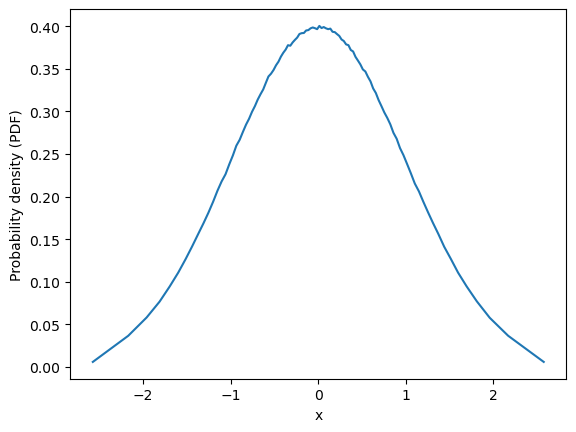

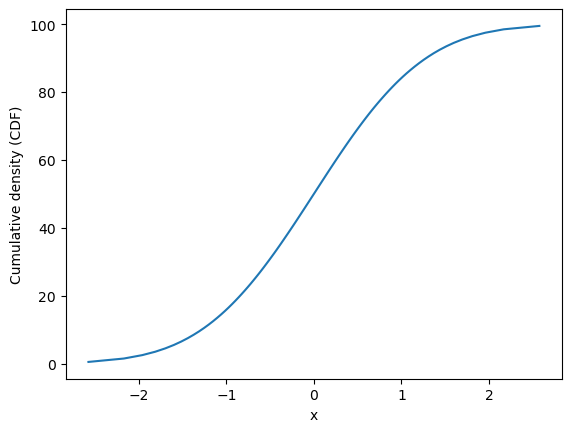

In [40]:
d = dist_x_linQ
plt.plot(d.percentiles,d.density)
plt.xlabel('x')
plt.ylabel('Probability density (PDF)')
plt.figure()
plt.plot(d.percentiles,d.ranks)
plt.xlabel('x')
plt.ylabel('Cumulative density (CDF)')

There, the sampling is such that percentiles ranges of a given width contain a constant number of points (y-axis of bottom panel is regularly sampled): bins in the middle of the x-range have smaller sampling sizes.

In [41]:
dist_y_linQ = Distribution(name='y',bintype='linQ')
dist_y_linQ.computeDistribution(sample=y_lognorm,vmin=ymin,vmax=ymax)

Text(0, 0.5, 'Cumulative density (CDF)')

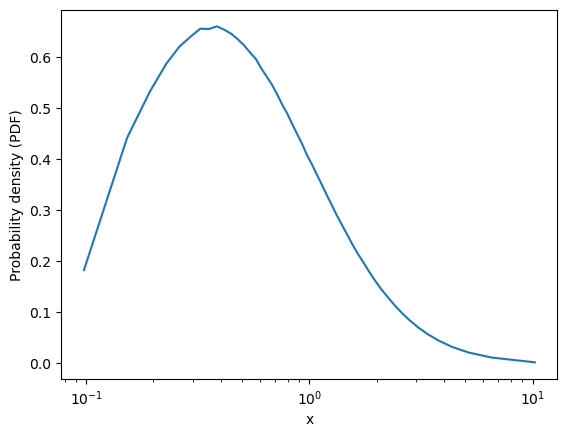

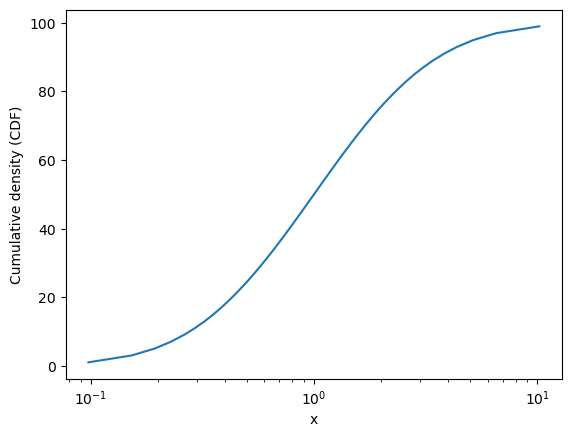

In [42]:
d = dist_y_linQ
plt.plot(d.percentiles,d.density)
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Probability density (PDF)')

plt.figure()
plt.plot(d.percentiles,d.ranks)
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Cumulative density (CDF)')

# Sample inverse-logarithmic ranks

In [43]:
dist_y_invlogQ = Distribution(name='y',bintype='invlogQ',nd=4,fill_last_decade=True)
dist_y_invlogQ.computeDistribution(sample=y_lognorm,vmin=ymin,vmax=ymax)

Text(0, 0.5, 'Cumulative density (CDF)')

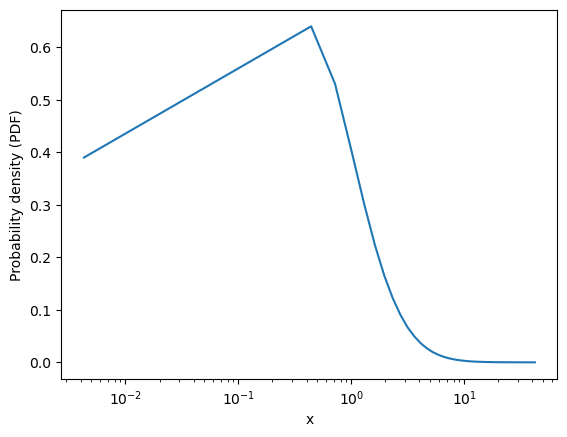

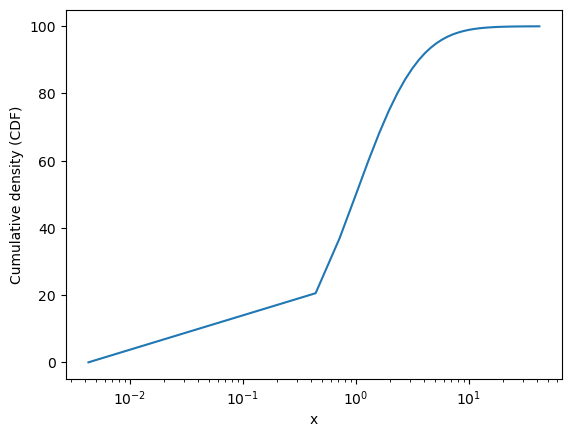

In [44]:
d = dist_y_invlogQ
plt.plot(d.percentiles,d.density)
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Probability density (PDF)')

plt.figure()
plt.plot(d.percentiles,d.ranks)
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Cumulative density (CDF)')

check that the curve bounds match
x bounds: 0.0 99.99
y bounds: 0.004288551188828768 41.98083669216271

check that the curve bounds match
x bounds: 0.0 99.99
y bounds: 0.004288551188828768 41.98083669216271



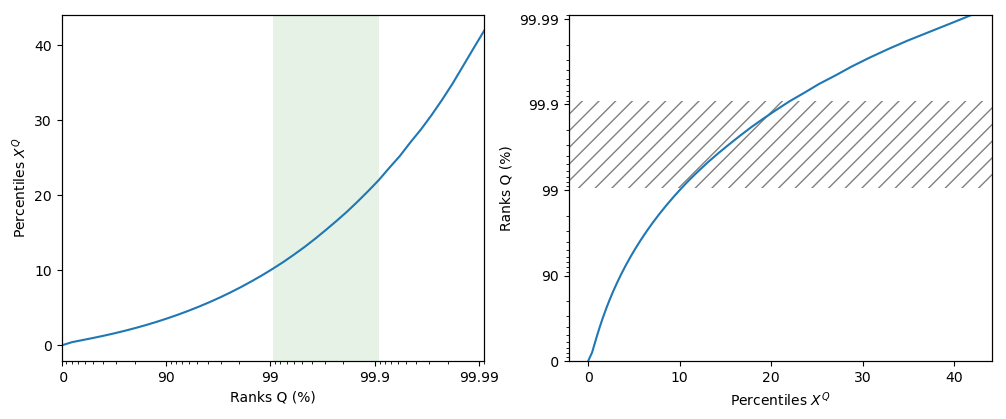

In [46]:
fig,axs = plt.subplots(ncols=2,figsize=(12,4.5))

ranks = d.ranks
perc = d.percentiles

#--- on IL x axis
ax=axs[0]
ax_show = ax.twiny()

#- set frame
setXaxisIL(ax,ranks)
#- show data
y = d.percentiles
showData(ax_show,ranks,perc)
#- add hatch
# addXHatch(ax_show,d.ranks,[20,30])
addXHatch(ax_show,ranks,[20,30],fill=True,hatch=None,alpha=0.1,color='g')

#- labels
ax.set_xlabel('Ranks Q (%)')
ax.set_ylabel('Percentiles $X^Q$')

print('check that the curve bounds match')
print('x bounds:',ranks[0],ranks[-1])
print('y bounds:',perc[0],perc[-1])
print()

#--- on IL y axis
ax=axs[1]
ax_show = ax.twinx()

#- set frame
setYaxisIL(ax,ranks)
#- show data
y = d.percentiles
showData(ax_show,ranks,perc,axisIL='y')
#- add hatch
addYHatch(ax_show,ranks,[20,30])

#- labels
ax.set_xlabel('Percentiles $X^Q$')
ax.set_ylabel('Ranks Q (%)')


print('check that the curve bounds match')
print('x bounds:',d.ranks[0],d.ranks[-1])
print('y bounds:',y[0],y[-1])
print()

# Equivalence between these sampling strategies

In [47]:
def plotMultiVisualization(axs,d,label,offset=0,setframe=True):
    
    if isinstance(d,list):
        pass

    else:
        axs[0,0].plot(d.percentiles,d.density,label=label)
        axs[0,1].plot(d.percentiles,d.density)
        axs[0,1].set_xscale('log')
        axs[1,0].plot(d.percentiles,d.ranks)
        axs[1,1].plot(d.percentiles,d.ranks)
        axs[1,1].set_xscale('log')
        
        subplotRanksILog(axs[2,0],d.ranks,d.percentiles,setframe=setframe)
        subplotRanksILog(axs[2,1],d.ranks,d.percentiles,setframe=setframe)
        axs[2,1].set_yscale('log')

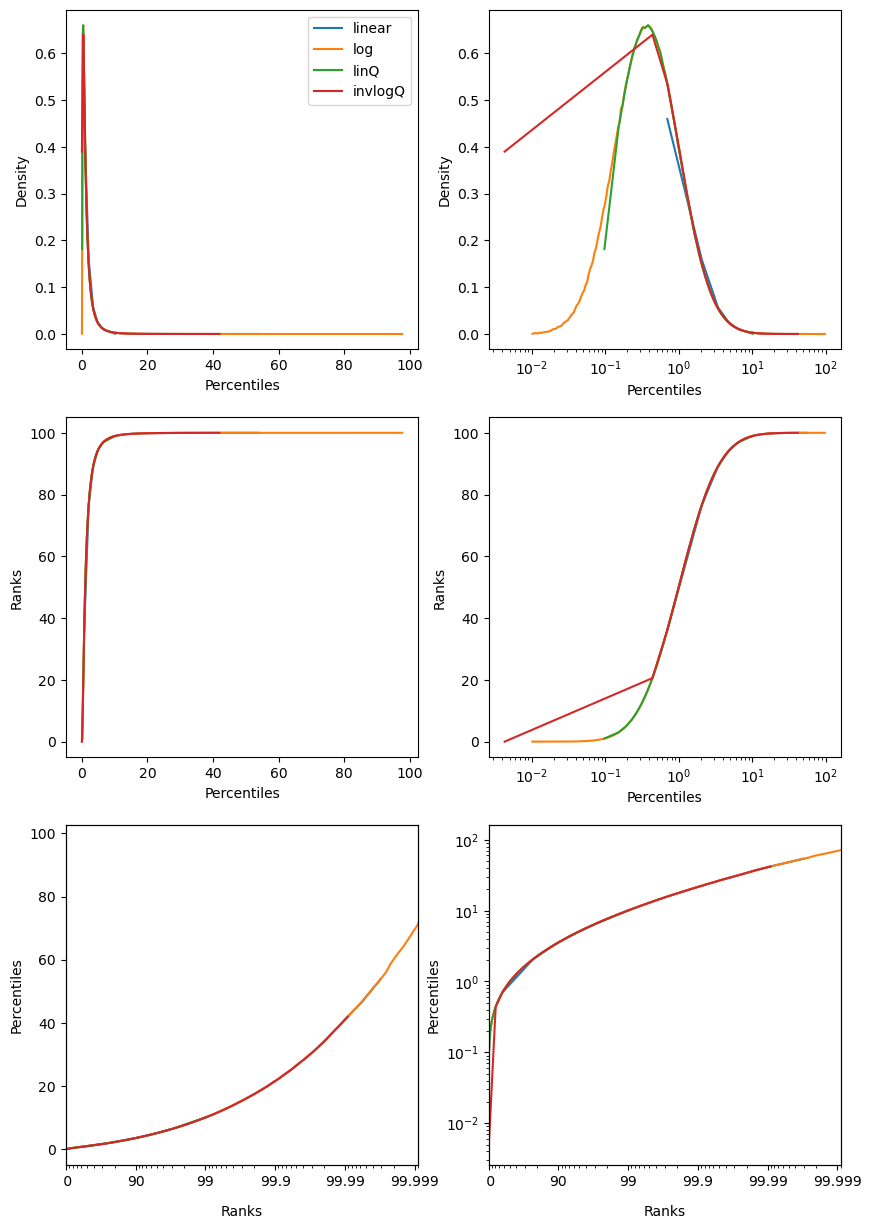

In [48]:
d_list = [dist_y_linear,dist_y_log,dist_y_linQ,dist_y_invlogQ]
d_lab = ['linear','log','linQ','invlogQ']

xlabels = ['Percentiles']*2+['Ranks']
ylabels = ['Density','Ranks','Percentiles']

fig,axs = plt.subplots(ncols=2,nrows=3,figsize=(10,15))

inds2plot = (0,1,2,3)

for i_d in inds2plot:
    plotMultiVisualization(axs,d_list[i_d],label=d_lab[i_d],offset=1,setframe=i_d==0)
    
# plt.rcParams["axes.labelpad"] = 4.0
#     axs[2,0].set_xlabel(labelpad=4.0)
    
for i in range(3):
    for j in range(2):
        axs[i,j].set_xlabel(xlabels[i],labelpad=4.0+25*(i==2))
        axs[i,j].set_ylabel(ylabels[i])
        

axs[0,0].legend()

plt.show()

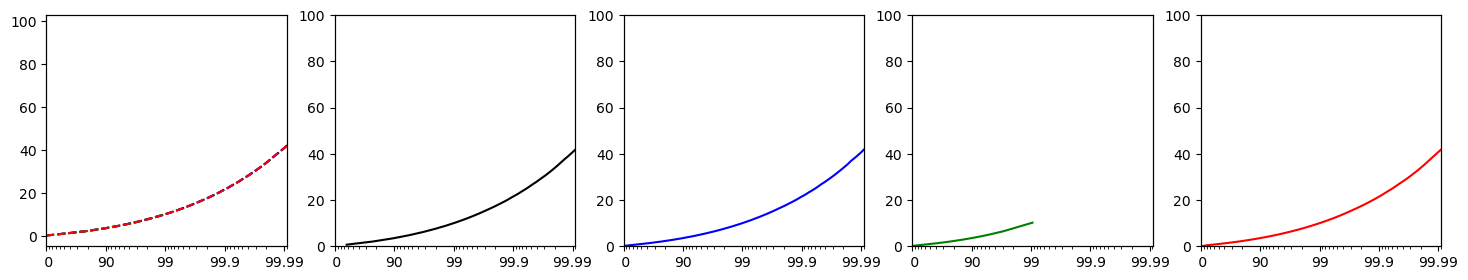

In [49]:
# Decompose last subplot into separate curves to check overlap

rank_list = [d.ranks for d in d_list]
perc_list = [d.percentiles for d in d_list]
cols = ['k','b','g','r']
ltypes = ['--']*4

rankmin=0
rankmax=99.99

fig,axs = plt.subplots(ncols=5,figsize=(18,3))

ax = axs[0]

subplotRanksILog(ax,rank_list,perc_list,rankmin=rankmin,rankmax=rankmax,col=cols,ltype=ltypes)

for i,d in zip(range(4),d_list):
    ax = axs[i+1]
    
    # Display
    subplotRanksILog(ax,rank_list[i],perc_list[i],rankmin=rankmin,rankmax=rankmax,col=cols[i])
    
    # Set y range
    ax.set_ylim(0,100)
    
